In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn .metrics import roc_auc_score
import scipy.stats as stats
import pylab

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


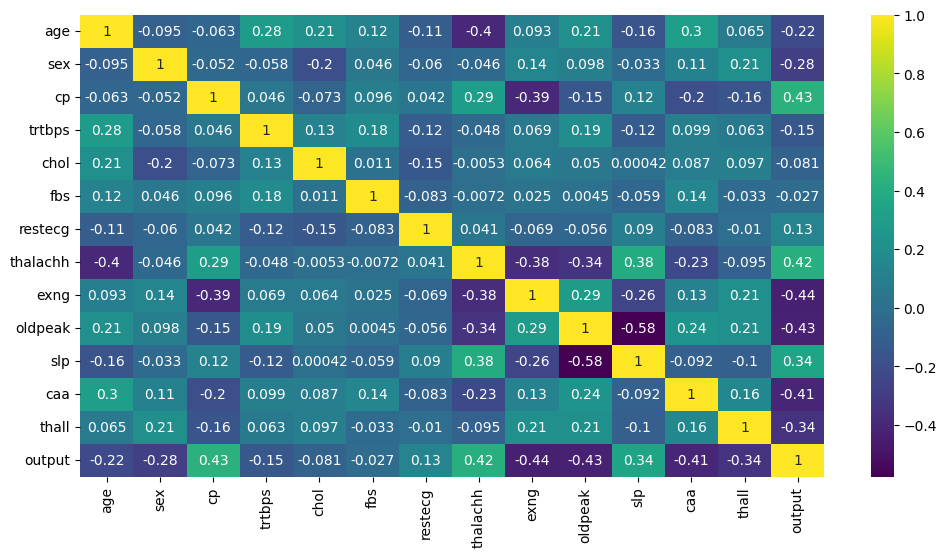

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

# Feature Scaling:-

In [11]:
x = df.drop('output', axis = 1)
y = df['output']
scal = MinMaxScaler()
scal_df = scal.fit_transform(x)
df1 = pd.DataFrame(scal_df, columns = df.columns[:-1])
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [12]:
x = df1
y = df['output']

In [13]:
x.shape

(302, 13)

In [14]:
y.shape

(302,)

# Feature Selection:-

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [16]:
calc_vif(df1[[i for i in df1.columns if i not in ['trtbps','sex','age','exng']]])

,variables,VIF
0,cp,2.139416
1,chol,6.096315
2,fbs,1.225801
3,restecg,2.025132
4,thalachh,13.189028
5,oldpeak,2.610964
6,slp,8.859627
7,caa,1.761258
8,thall,11.828269


In [17]:
df1.drop(['trtbps','sex','age','exng'], axis = 1, inplace = True)

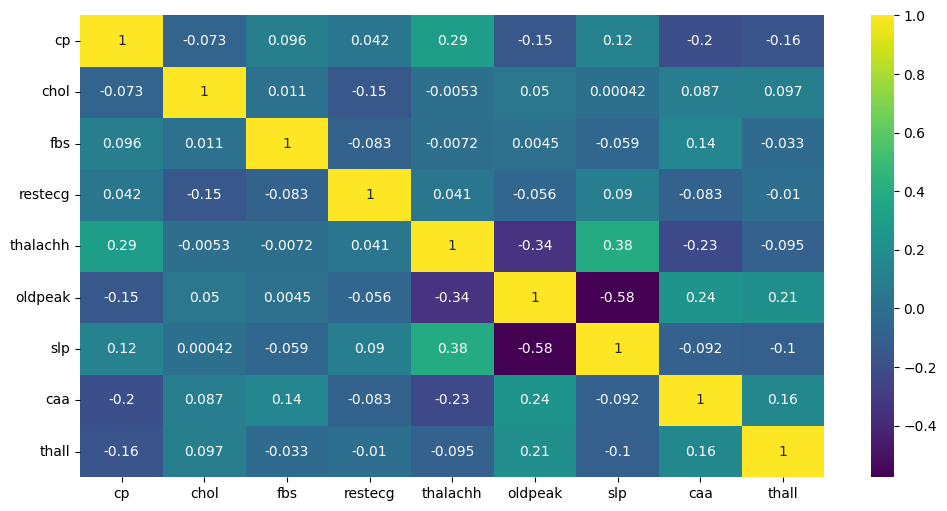

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot = True, cmap = 'viridis')
plt.show()

# Data Distribution:-

In [19]:
def plot_data(df):
    num_columns = len(df.columns)
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(10, 4 * num_columns))
    
    for i, column in enumerate(df.columns):
        # Histogram
        sns.histplot(df[column], kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histogram for {column}')
        
        # Probability plot
        stats.probplot(df[column], dist='norm', plot=axes[i, 1])
        axes[i, 1].set_title(f'Probability Plot for {column}')
    
    plt.tight_layout()
    plt.show()

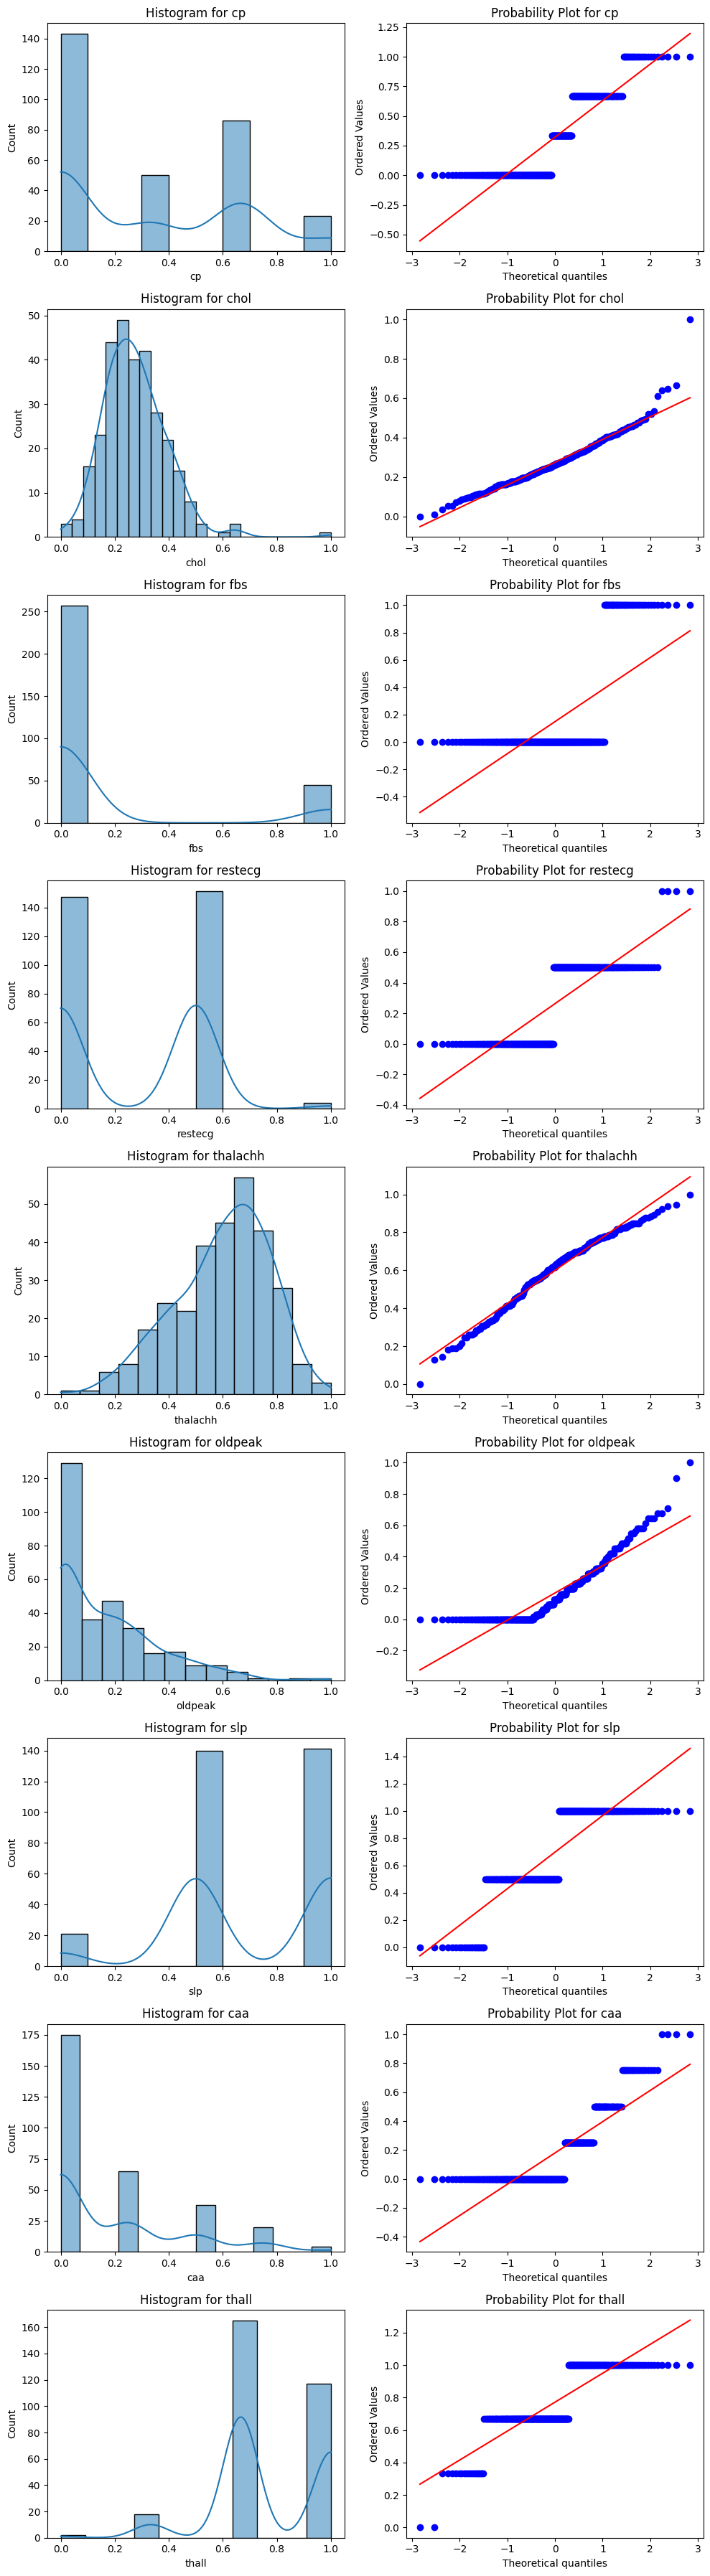

In [20]:
plot_data(df1)

# Outliers Treatment:-

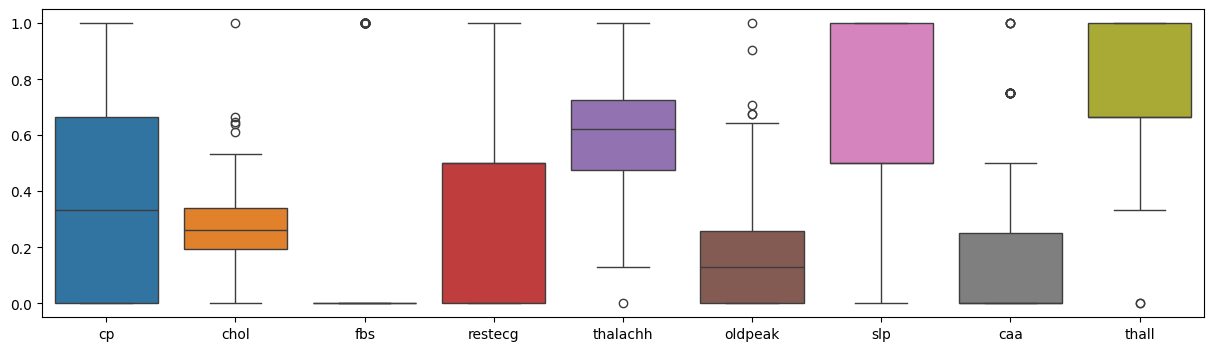

In [21]:
plt.figure(figsize=(15,4))
sns.boxplot(df1)
plt.show()

In [22]:
def outlier_data(df):
    df_outlier = df.copy()
    for column in df.columns:
        upper_limit = df[column].mean() + 3*df[column].std()
        lower_limit = df[column].mean() - 3*df[column].std()
        
        df_outlier[column] = df_outlier[column].apply(lambda x: upper_limit if x > upper_limit else x)
        
        df_outlier[column] = df_outlier[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    return df_outlier  

In [23]:
df = outlier_data(df1)

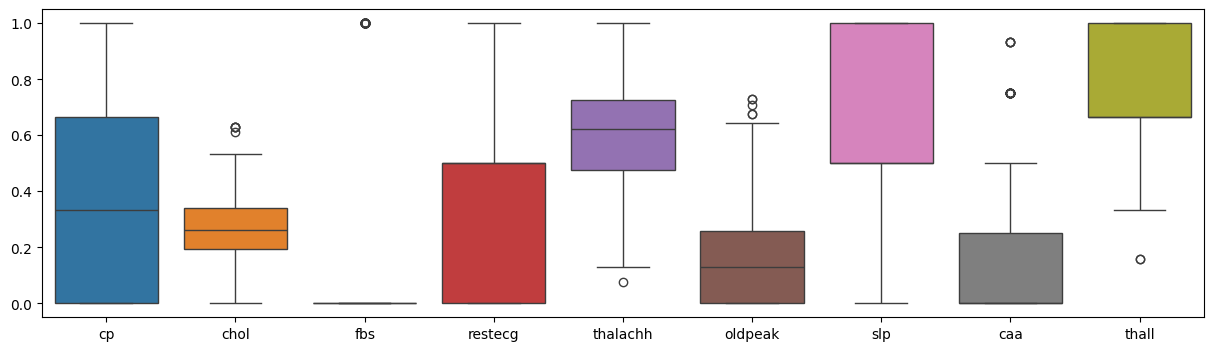

In [24]:
plt.figure(figsize=(15,4))
sns.boxplot(df)
plt.show()

In [25]:
df.describe()

,cp,chol,fbs,restecg,thalachh,oldpeak,slp,caa,thall
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.321192,0.273678,0.149007,0.263245,0.600017,0.166767,0.698675,0.178771,0.772573
std,0.344015,0.111699,0.356686,0.263014,0.174030,0.181923,0.308137,0.248955,0.200740
min,0.000000,0.000000,0.000000,0.000000,0.075259,0.000000,0.000000,0.000000,0.158498
25%,0.000000,0.194064,0.000000,0.000000,0.475191,0.000000,0.500000,0.000000,0.666667
50%,0.333333,0.261416,0.000000,0.500000,0.622137,0.129032,0.500000,0.000000,0.666667
75%,0.666667,0.339612,0.000000,0.500000,0.725191,0.258065,1.000000,0.250000,1.000000
max,1.000000,0.629590,1.000000,1.000000,1.000000,0.730226,1.000000,0.934697,1.000000


# Balancing data:-

In [26]:
x = df
x.shape

(302, 9)

In [27]:
y.value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [28]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 42)
x_res,y_res = cc.fit_resample(x,y)

In [29]:
y_res.value_counts()

output
0    138
1    138
Name: count, dtype: int64

# Splite the data:-

In [30]:
x = x_res
y = y_res

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# With Logistic Regression:-

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [33]:
model.fit(x_train,y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

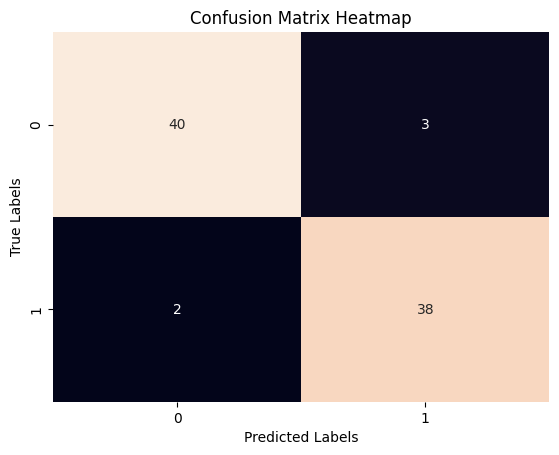

In [36]:
sns.heatmap(confusion_matrix(y_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [37]:
accuracy_score(y_test, y_pred)

0.9397590361445783

In [38]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.93      0.95      0.94        40

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83



In [39]:
print("ROC_AUC_SCORE =", np.round(roc_auc_score(y_test, y_pred),5))

ROC_AUC_SCORE = 0.93961


# Hyperparameter Tunning:-

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1],
             'max_iter':[100,200,300,400,500,600,700,800,900,1000,1500,200]}

In [42]:
model_logit = GridSearchCV(model, param_grid = parameter,scoring = 'accuracy', cv = 5)
model_logit.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900, 1000, 1500, 200],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [43]:
model_logit.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [44]:
model_logit.best_score_

0.7465587044534413

In [45]:
y_logit_pred = model_logit.predict(x_test)

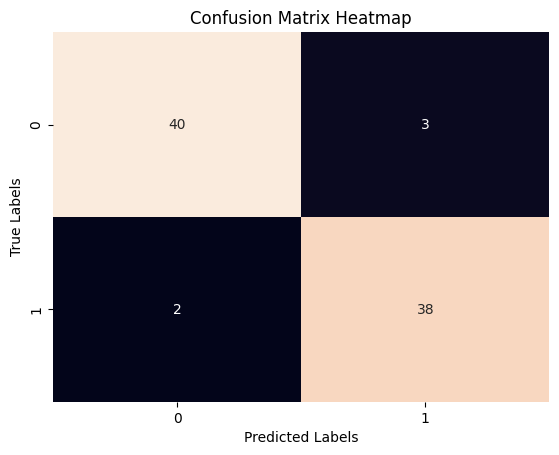

In [46]:
sns.heatmap(confusion_matrix(y_logit_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [47]:
print(classification_report(y_logit_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.93      0.95      0.94        40

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83



In [48]:
print("ROC_AUC_SCORE =", np.round(roc_auc_score(y_test, y_logit_pred),5))

ROC_AUC_SCORE = 0.93961


# With Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
tree_pred = tree_model.predict(x_test)

from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(tree_model,filled = True)
plt.show()

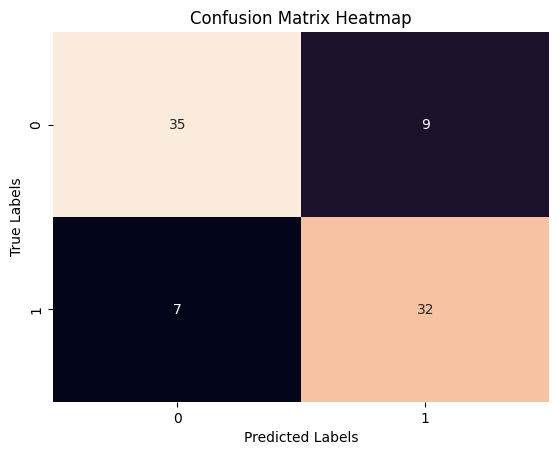

In [50]:
sns.heatmap(confusion_matrix(tree_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [51]:
print(classification_report(tree_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.78      0.82      0.80        39

    accuracy                           0.81        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.81      0.81      0.81        83



# Tunning With Decision Tree

In [52]:
tree_param = {'criterion':["entropy"],
              'splitter':['best'], 
              'max_depth' :[2,3,4,5,6,7,8,9],
              'random_state':[51]}

In [53]:
model_tree = GridSearchCV(tree_model, param_grid = tree_param,scoring = 'accuracy', cv = 5)
model_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [51], 'splitter': ['best']},
             scoring='accuracy')

In [54]:
model_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'random_state': 51,
 'splitter': 'best'}

In [55]:
model_tree.best_score_

0.7310391363022942

In [56]:
t_pred = model_tree.predict(x_test)

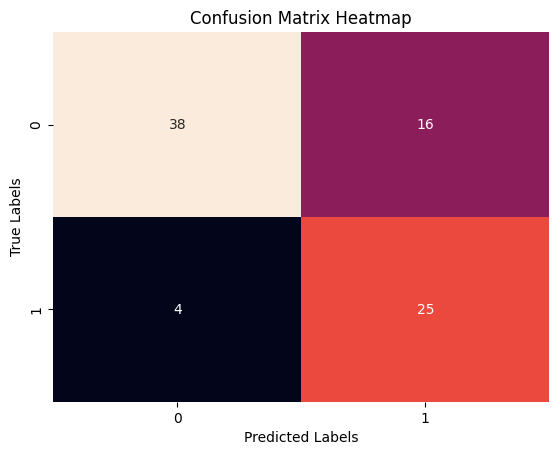

In [57]:
sns.heatmap(confusion_matrix(t_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [58]:
print(classification_report(t_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        54
           1       0.61      0.86      0.71        29

    accuracy                           0.76        83
   macro avg       0.76      0.78      0.75        83
weighted avg       0.80      0.76      0.76        83



# With Random Forest:-

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rm_model = RandomForestClassifier()
rm_model.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
rm_pred = rm_model.predict(x_test)

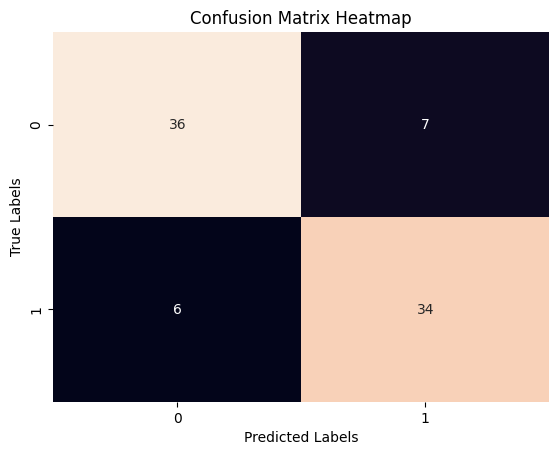

In [62]:
sns.heatmap(confusion_matrix(rm_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [63]:
print(classification_report(t_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79        54
           1       0.61      0.86      0.71        29

    accuracy                           0.76        83
   macro avg       0.76      0.78      0.75        83
weighted avg       0.80      0.76      0.76        83



# Tunning With RandaomRandomForestClassifier:-

In [64]:
param = {'n_estimators' :[1,10,20,30,40,50,60,70,80,90,100,150,200,250,300],
         'criterion' : ['gini','entropy'],
         'max_depth' : [2,3,4,5,6,7,8,9,10],
         'max_leaf_nodes' : [5,10,15,20,25]}

In [65]:
rm_grid = GridSearchCV(rm_model, param_grid = param,scoring = 'accuracy', cv = 5)
rm_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [5, 10, 15, 20, 25],
                         'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 150, 200, 250, 300]},
             scoring='accuracy')

In [66]:
rm_grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 25, 'n_estimators': 70}

In [67]:
rm_grid.best_score_

0.8086369770580297

In [68]:
rmg_pred = rm_grid.predict(x_test)

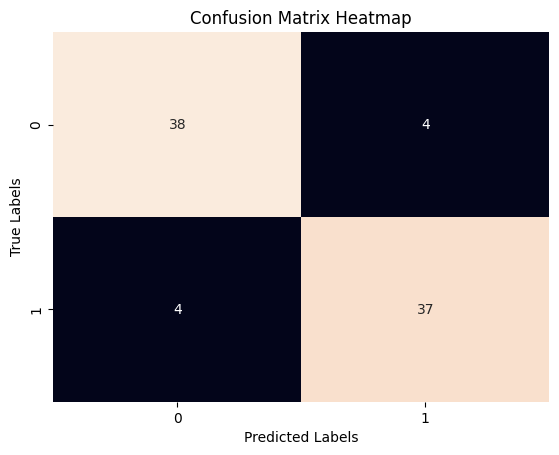

In [69]:
sns.heatmap(confusion_matrix(rmg_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# With SVM:-

In [70]:
from sklearn.svm import SVC

In [71]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [72]:
svc_pred = svc_model.predict(x_test)

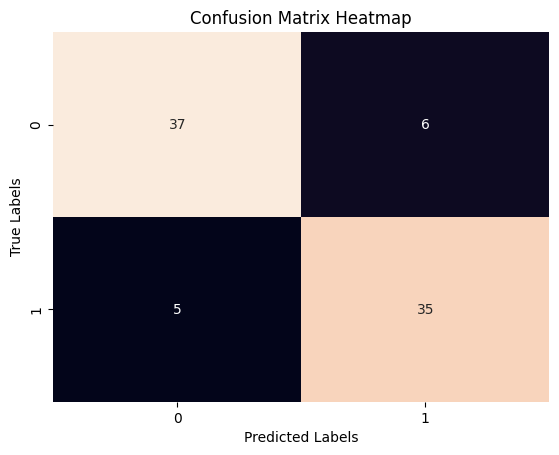

In [73]:
sns.heatmap(confusion_matrix(svc_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [74]:
print(classification_report(svc_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        43
           1       0.85      0.88      0.86        40

    accuracy                           0.87        83
   macro avg       0.87      0.87      0.87        83
weighted avg       0.87      0.87      0.87        83



# Tunning with svc

In [75]:
param_grid = {'C' :[0.1,0.5,1,2,3,4,5],
               'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma':['scale','auto'],
               'tol':[0.001,0.01,0.1,1,2,3],
               'max_iter':[-1,1,2,3,4,5,6,7,8,9,10]}

In [76]:
svc_grid = GridSearchCV(svc_model, param_grid = param_grid,scoring = 'accuracy', cv = 3)
svc_grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\user\AppDat

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'tol': [0.001, 0.01, 0.1, 1, 2, 3]},
             scoring='accuracy')

In [77]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'tol': 0.001}

In [78]:
svcg_pred = svc_grid.predict(x_test)

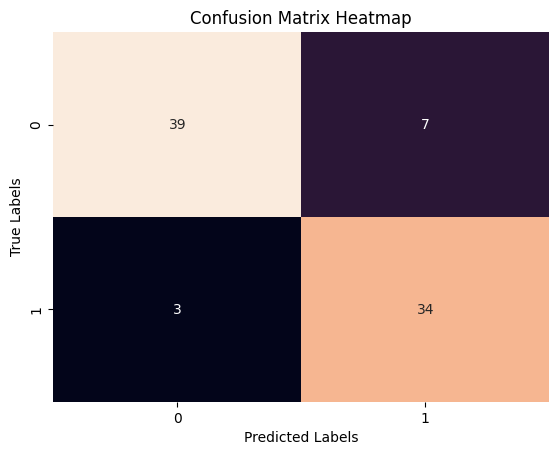

In [79]:
sns.heatmap(confusion_matrix(svcg_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [80]:
print(classification_report(svcg_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        46
           1       0.83      0.92      0.87        37

    accuracy                           0.88        83
   macro avg       0.88      0.88      0.88        83
weighted avg       0.88      0.88      0.88        83



# Implimentation with AdaBoost:

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [82]:
adamodel = AdaBoostClassifier(estimator=model, n_estimators=100,learning_rate=1)
adamodel.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=100)

In [83]:
aday_pred = adamodel.predict(x_test)

In [84]:
accuracy_score(y_test,aday_pred)

0.9156626506024096

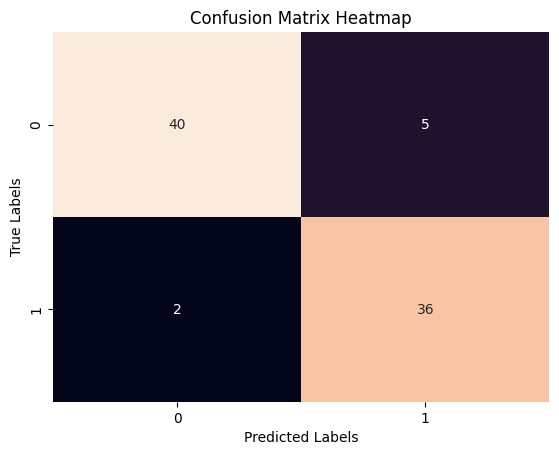

In [85]:
sns.heatmap(confusion_matrix(aday_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [86]:
print(classification_report(aday_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        45
           1       0.88      0.95      0.91        38

    accuracy                           0.92        83
   macro avg       0.92      0.92      0.92        83
weighted avg       0.92      0.92      0.92        83



# Tunning With AdaBoost:-

In [87]:
ada_param = {'n_estimators':[50,70,90,100,120,150,200,250,300],'estimator':[model,rm_model,svc_model] ,'learning_rate':[1]}

In [88]:
ada_grid = GridSearchCV(adamodel, param_grid = ada_param,scoring = 'accuracy', cv = 3)
ada_grid.fit(x_train,y_train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(estimator=LogisticRegression(),
                                          learning_rate=1, n_estimators=100),
             param_grid={'estimator': [LogisticRegression(),
                                       RandomForestClassifier(), SVC()],
                         'learning_rate': [1],
                         'n_estimators': [50, 70, 90, 100, 120, 150, 200, 250,
                                          300]},
             scoring='accuracy')

In [89]:
ada_grid.best_params_

{'estimator': RandomForestClassifier(), 'learning_rate': 1, 'n_estimators': 90}

In [90]:
ada_grid.best_score_

0.7669871794871795

In [91]:
grid_pred = ada_grid.predict(x_test)

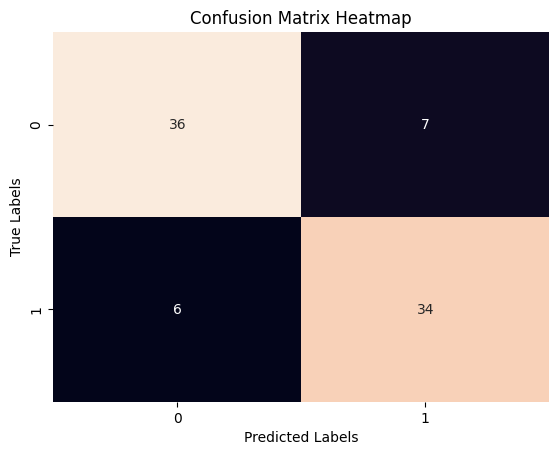

In [92]:
sns.heatmap(confusion_matrix(grid_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# With GradientBoost:-

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train,y_train)
gb_model.score(x_train,y_train)

0.9948186528497409

In [95]:
gb_model.score(x_test,y_test)

0.7951807228915663

In [96]:
gb_pred = gb_model.predict(x_test)

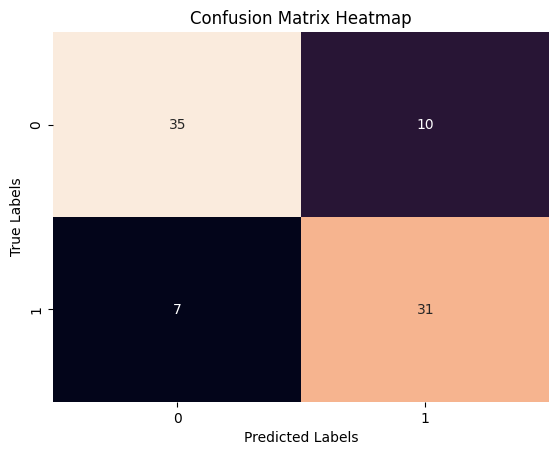

In [104]:
sns.heatmap(confusion_matrix(gb_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Tunning GradientBoost:-

In [98]:
gb_param = {'loss' : ['log_loss', 'exponential'],'n_estimators':[50,100,200],
                                        'learning_rate':[0.05,0.1,0.15],'criterion' : ['friedman_mse', 'squared_error'],
                                         'max_features':[6,8,9,10],'max_depth':[3,4,6,8]}

In [99]:
gb_grid = GridSearchCV(gb_model, param_grid = gb_param,scoring = 'accuracy', cv = 3)
gb_grid.fit(x_train,y_train)
gb_grid.score(x_train,y_train)

0.9067357512953368

In [100]:
gb_grid.score(x_test,y_test)

0.8554216867469879

In [101]:
gb_grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.05,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': 6,
 'n_estimators': 50}

In [102]:
gboost_pred = gb_grid.predict(x_test)

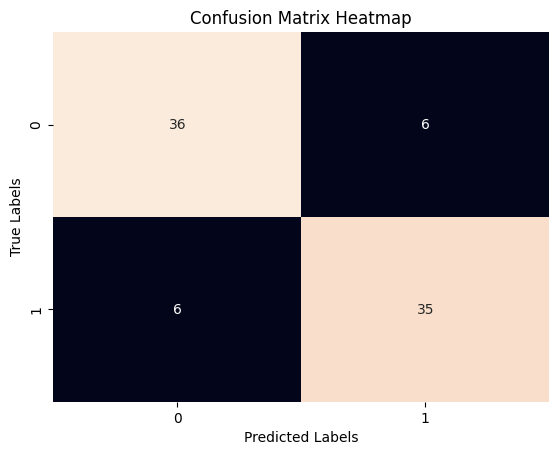

In [103]:
sns.heatmap(confusion_matrix(gboost_pred,y_test), annot = True, cbar = False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Summary:-

# At the end of this dataset ML experiment we get that "Logistic Regression" give us best Accuracy, Precision and Recall.